In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas

# Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert Y_train.shape == (50000, 1)
assert Y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

In [4]:
Y_train=keras.utils.to_categorical(Y_train)
Y_test=keras.utils.to_categorical(Y_test)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
Y_train.shape

(50000, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


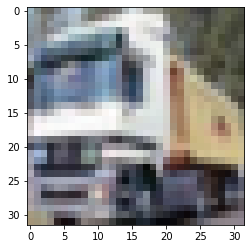

In [7]:
plt.imshow(X_train[1])
print(Y_train[1])

# Model

In [32]:
def create_model():
    inputs = keras.Input(shape=(32, 32, 3))



    x = keras.layers.Conv2D(32, 3)(inputs)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64, 3)(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Activation('relu')(x)

    block_1_output = keras.layers.MaxPooling2D(3,name="block_1_output")(x)




    x = keras.layers.Conv2D(64, 3, padding="same")(block_1_output)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64, 3, padding="same")(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)

    block_2_output = keras.layers.add([x, block_1_output])
    block_2_output = keras.layers.Activation('relu')(block_2_output)





    x = keras.layers.Conv2D(64, 3, padding="same")(block_2_output)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(64, 3, padding="same")(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)

    block_3_output = keras.layers.add([x, block_2_output])
    block_3_output = keras.layers.Activation('relu')(block_3_output)




    x = keras.layers.Conv2D(64, 3)(block_3_output)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256,activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)

    outputs = keras.layers.Dense(10,activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="small_resnet")
    # model.summary()

    return model

## Model1

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


782/782 [==============================] - 19s 23ms/step - loss: 1.3062 - accuracy: 0.5238 - val_loss: 1.4779 - val_accuracy: 0.5007
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.8879 - accuracy: 0.6877 - val_loss: 1.1417 - val_accuracy: 0.6010
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.7355 - accuracy: 0.7455 - val_loss: 0.9172 - val_accuracy: 0.6748
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6351 - accuracy: 0.7833 - val_loss: 0.7449 - val_accuracy: 0.7433
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5682 - accuracy: 0.8063 - val_loss: 0.6926 - val_accuracy: 0.7674
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5158 - accuracy: 0.8242 - val_loss: 0.8717 - val_accuracy: 0.7000
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.4648 - accuracy: 0.8412 - val_loss: 0.9395 - val_accuracy: 0.7177
Epo

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


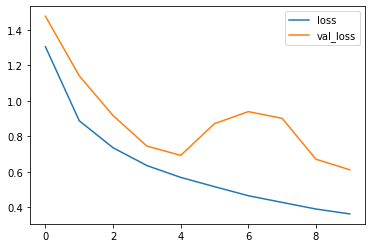

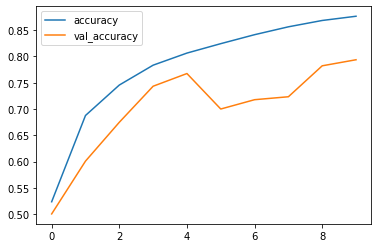

In [36]:
model=create_model()
model.save("model1.h5")
keras.utils.plot_model(model, "small_resnet.png", show_shapes=True)

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


history1=model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_test, Y_test),
)

history1_df=pandas.DataFrame(history1.history)
history1_df.loc[:, ['loss', 'val_loss']].plot()
history1_df.loc[:, ['accuracy', 'val_accuracy']].plot()


model.save("model1.h5")

## Model2

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


782/782 [==============================] - 20s 24ms/step - loss: 1.3041 - accuracy: 0.5244 - val_loss: 1.5804 - val_accuracy: 0.4830
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.8687 - accuracy: 0.6979 - val_loss: 1.1775 - val_accuracy: 0.5901
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.7148 - accuracy: 0.7558 - val_loss: 0.8423 - val_accuracy: 0.7032
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6222 - accuracy: 0.7879 - val_loss: 0.9719 - val_accuracy: 0.6668
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5531 - accuracy: 0.8133 - val_loss: 0.7752 - val_accuracy: 0.7356
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5020 - accuracy: 0.8284 - val_loss: 0.8806 - val_accuracy: 0.7135
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.4574 - accuracy: 0.8444 - val_loss: 0.7865 - val_accuracy: 0.7430
Epo

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


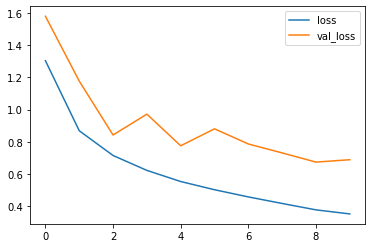

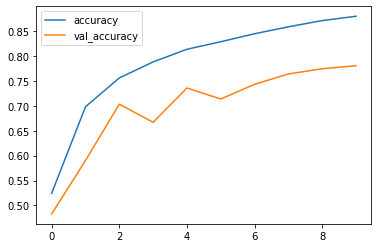

In [37]:
model=create_model()

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


history2=model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_test, Y_test),
)

history2_df=pandas.DataFrame(history2.history)
history2_df.loc[:, ['loss', 'val_loss']].plot()
history2_df.loc[:, ['accuracy', 'val_accuracy']].plot()

model.save("model2.h5")

## Using Early Stopping

In [38]:
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


782/782 [==============================] - 20s 23ms/step - loss: 1.3004 - accuracy: 0.5278 - val_loss: 1.5117 - val_accuracy: 0.4840
Epoch 2/500
782/782 [==============================] - 18s 23ms/step - loss: 0.8804 - accuracy: 0.6913 - val_loss: 1.1119 - val_accuracy: 0.6384
Epoch 3/500
782/782 [==============================] - 18s 23ms/step - loss: 0.7281 - accuracy: 0.7486 - val_loss: 1.2783 - val_accuracy: 0.5747
Epoch 4/500
782/782 [==============================] - 18s 23ms/step - loss: 0.6357 - accuracy: 0.7848 - val_loss: 1.1134 - val_accuracy: 0.6471
Epoch 5/500
782/782 [==============================] - 18s 23ms/step - loss: 0.5665 - accuracy: 0.8063 - val_loss: 0.9390 - val_accuracy: 0.6987
Epoch 6/500
782/782 [==============================] - 18s 23ms/step - loss: 0.5100 - accuracy: 0.8279 - val_loss: 0.8797 - val_accuracy: 0.7260
Epoch 7/500
782/782 [==============================] - 18s 23ms/step - loss: 0.4662 - accuracy: 0.8395 - val_loss: 0.8252 - val_accuracy: 0.73

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


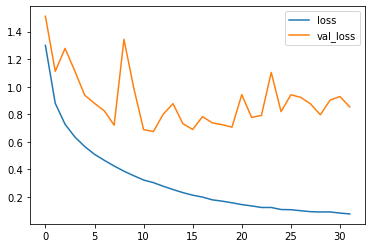

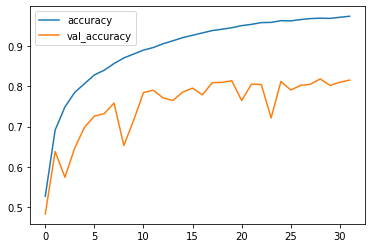

In [39]:
model=create_model()

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


history3=model.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=500,
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping]
)

history3_df=pandas.DataFrame(history3.history)
history3_df.loc[:, ['loss', 'val_loss']].plot()
history3_df.loc[:, ['accuracy', 'val_accuracy']].plot()

model.save("model3.h5")

In [44]:
import numpy as np

In [50]:
Y_pred=model.predict(X_test)
count_wrong=0


for i in range (X_test.shape[0]):
  if(np.argmax(Y_pred[i])!=np.argmax(Y_test[i])):
    # print(np.argmax(Y_pred[i]))
    # print(np.argmax(Y_test[i]))
    # plt.imshow(X_test[i])
    # plt.show()
    count_wrong+=1

print(X_test.shape[0])
print(count_wrong)

10000
2099
